지도학습 - 분류/회귀<br><br>

이진 분류 : target을 두고 클래스를 0 또는 1로 분류

회귀 : 임의의 어떤 숫자(target)를 예측

<br><br>
K-최근접이웃 분류
- 클래스를 구하고자 하는 대상의 주변 클래스가 ☆가 2개, ♠가 3개라면,<br>target의 예측 클래스는 ♠이다.

K-최근접이웃 회귀
- 구하고자 하는 대상의 주변이 5,5,10,15,15라면<br>target의 예측은
(5+5+10+15+15)/5 = 10이다.

### 훈련 데이터 준비

In [1]:
import numpy as np

In [14]:
zucchini_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
    )

zucchini_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

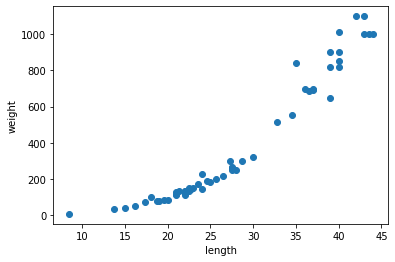

In [15]:
import matplotlib.pyplot as plt

plt.scatter(zucchini_length,zucchini_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

훈련 세트 준비 - **train_test_split** 이용

In [18]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(zucchini_length,zucchini_weight,random_state=42)

train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

**stratify 매개변수 사용 X**<br>
분류와 다르게 임의의 숫자가 타겟이 될 것이기 때문에 굳이 골고루 섞을 필요 없다.<br>

길이 특성을 사용하는 1차원 배열(zucchini_length)을 train_test_split에 넣으면 결과(train_input, test_input)는 1차원 배열이 되게 된다.<br><br>

사이킷 런의 모델들은 입력데이터를 2차원 배열로 기대한다.
(행방향 : 샘플, 열방향 : 특성)<br>
train_input, test_input이 1차원 배열이기 때문에 reshape 메소드를 이용하여 바꿔줌.<br><br>

행 차원을 -1로 지정하는 것은 , 변경된 배열의 행 차원은 원래 배열의 길이와 열 차원으로부터 추정한다는 것이다.
<br>(열 차원을 -1로 지정할 경우 반대)<br><br>

np.array([1,2,3]).reshape(-1,1)<br>
array([[1],<br>
&nbsp; [2],<br>
&nbsp; [3]])

사이킷 런에서 타겟 데이터(train_target,test_target)는 일반적으로 1차원 배열이기 때문에 바꿔주지 않고 그대로 사용한다.

### 회귀 모델 훈련

In [21]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input,train_target)

knr.score(test_input,test_target)

0.9928094061010639

회귀에서는 R²(결정계수)를 반환한다.<br><br>
R²= 1 - {Σ(test 타깃-예측)²/Σ(test 타깃-평균)²}
<br><br> 예측 값이 평균 값과 비슷해지면 1과 가까운 값이 반환 될 것(분자가 0에 가까워 지면....)

In [22]:
# 평균 제곱근 오차(사이킷런 메트릭스 모듈에 있다.)
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


test_input으로 예측한 값을 test_prediction에 넣어서 두번째 매개변수로 넣는다.<br>
test_target과 test_prediction의 차이를 평균내서 전달해줌.

무게를 예측했는데 대략 19g정도 오차가 나는 것.(어느 방향으로든지...)

### 과대 적합 & 과소 적합

In [23]:
knr.score(train_input, train_target)

0.9698823289099255

In [24]:
knr.score(test_input, test_target)

0.9928094061010639

훈련점수보다 테스트 점수가 더 높게 나왔다.<br><br>
일반적으로 훈련점수가 테스트 점수보다 더 높아야한다.<br>테스트 점수가 더 높으면 우연히 맞췄을 확률이 높기 때문<br><br>

- 훈련 점수 < 테스트 점수 : 과소 적합
- 훈련 점수 >> 테스트 점수 : 과대 적합


#### 이웃 개수 줄이기

In [25]:
knr.n_neighbors = 3
knr.fit(train_input, train_target)

print(knr.score(train_input,train_target))

0.9804899950518966


In [26]:
knr.score(test_input, test_target)

0.974645996398761

과대 적합 **↓** 이웃의 개수 **↑** 과소적합

알고리즘에 따라 전처리나 스케일링이 필요한 경우가 있다.
<br><br>
특성이 하나가 아닌 두개였다면, train input이 2차원 배열일 것이다.<br>
각 특성별로 표준화를 해야하긴 하다. 산점도를 그리기는 힘들것....<br><br>
훈련데이터가 굉장히 많다면 랜덤하게만 섞어도 꽤 괜찮은 모델이 나올수도있다. 데이터가 너무 작거나, 어떤 샘플의 개수가 너무 적으면 랜덤하게 섞어도 편향될 수 있기 때문에 stratify  매개변수를 사용해야한다.<br><br>


In [29]:
# 3차원 배열의 reshape
np.array([1,2,3,4,5,6]).reshape(2,3,1)

array([[[1],
        [2],
        [3]],

       [[4],
        [5],
        [6]]])

In [31]:
np.array([[1, 2, 3],
       [4, 5, 6]]).reshape(2,3,1)

array([[[1],
        [2],
        [3]],

       [[4],
        [5],
        [6]]])

In [35]:
# 그러나 개수에 맞지 않는 형태로 나누려고하면 에러 발생
#np.array([1,2,3,4,5,6]).reshape(3,3)
# ValueError: cannot reshape array of size 6 into shape (3,3)